In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

### Import data

In [12]:
abort = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/output.abort.nc')
GridU = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_U.nc')
GridV = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_V.nc')
GridT = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_T.nc')
restartFile = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/31mar23/2023033100_000.nc')

xIdxAb = 226 -1     #fortran indexing starts at 1
yIdxAb = 374 -1     #fortran indexing starts at 1

abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-04-01T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    19/12/2024 18:18:36 -0800
    file_name:    output.abort.nc

In [13]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]
vmask = 1 - mesh.vmask[0]

### Look at 01apr23 restart

Text(0.5, 1.0, 'Diff')

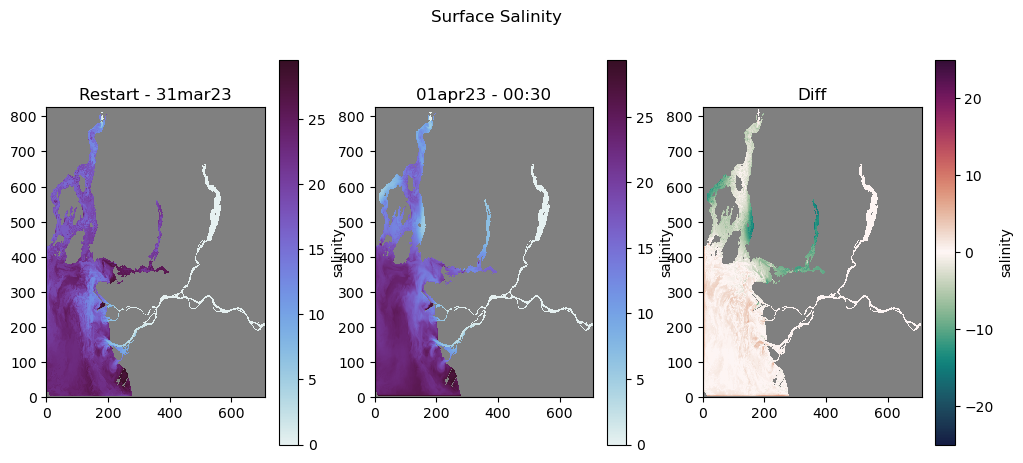

In [14]:
masked_sn = np.ma.masked_array(restartFile['sn'][0,0], mask=tmask[0])
masked_sal = np.ma.masked_array(GridT.vosaline[0, 0], mask=tmask[0])

cmap1 = cm.cm.dense
cmap1.set_bad('grey')

cmap2 = cm.cm.curl
cmap2.set_bad('grey')

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_sn,cmap=cmap1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('Surface Salinity')
ax.set_title('Restart - 31mar23')

pm = ax1.pcolormesh(masked_sal,cmap=cmap1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('01apr23 - 00:30')

pm = ax2.pcolormesh(masked_sal - masked_sn,cmap=cmap2,vmin=-25,vmax=25)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff')


Text(0.5, 1.0, 'Diff')

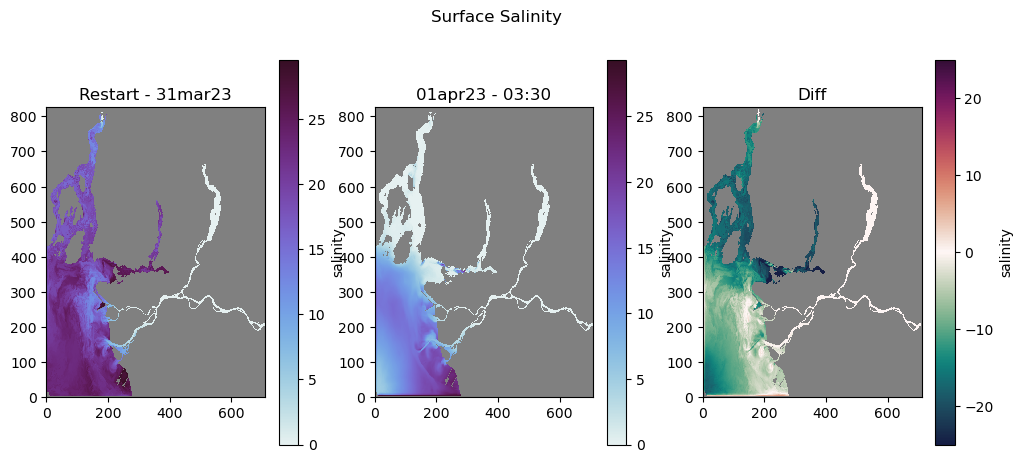

In [17]:
masked_sn = np.ma.masked_array(restartFile['sn'][0,0], mask=tmask[0])
masked_sal = np.ma.masked_array(GridT.vosaline[3, 0], mask=tmask[0])

cmap1 = cm.cm.dense
cmap1.set_bad('grey')

cmap2 = cm.cm.curl
cmap2.set_bad('grey')

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_sn,cmap=cmap1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('Surface Salinity')
ax.set_title('Restart - 31mar23')

pm = ax1.pcolormesh(masked_sal,cmap=cmap1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('01apr23 - 03:30')

pm = ax2.pcolormesh(masked_sal - masked_sn,cmap=cmap2,vmin=-25,vmax=25)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff')


Text(0.5, 1.0, 'Diff')

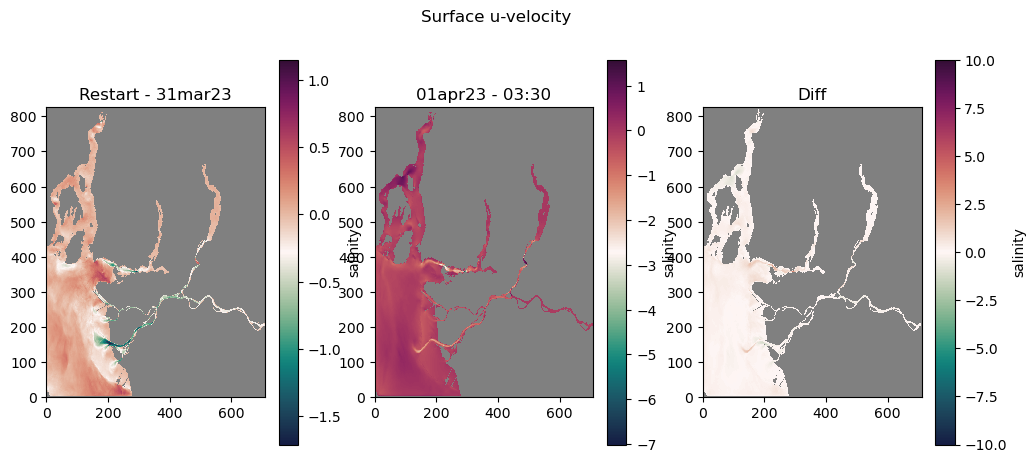

In [23]:
masked_un = np.ma.masked_array(restartFile['un'][0,0], mask=tmask[0])
masked_uvel = np.ma.masked_array(GridU.vozocrtx[3, 0], mask=tmask[0])

cmap1 = cm.cm.dense
cmap1.set_bad('grey')

cmap2 = cm.cm.curl
cmap2.set_bad('grey')

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_un,cmap=cmap2)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('Surface u-velocity')
ax.set_title('Restart - 31mar23')

pm = ax1.pcolormesh(masked_uvel,cmap=cmap2)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('01apr23 - 03:30')

pm = ax2.pcolormesh(masked_un - masked_uvel,cmap=cmap2,vmin=-10,vmax=10)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff')
